# INTRODUCTION

In this project, we are looking at using the pandas plotting functionality in the Jupyter Notebook. In this dataset on job outcomes of students who graduated from college b/t 2010 - 2012 released by [American Community Survey](https://www.census.gov/programs-surveys/acs/) and released by FiveThirtyEight on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

This dataset contains the following information:

| **Variable**              | **Description**                              |
|---------------------------|----------------------------------------------|
| Rank                      | Rank by median earning                       |
| Major_code                | College major code                           |
| Major                     | College major                                |
| Major_category            | Category of the college major                |
| Total                     | Total # of people with given major           |
| Sample_size               | Sample size of full-time yr- round graduates |
| Men                       | # of male graduates                          |
| Women                     | # of female graduates                        |
| ShareWomen                | % in which female graduates with given major |
| Employed                  | # of employed graduates                      |
| Median                    | Median annual income of full-time graduate   |
| Low_wage_jobs             | # of graduates with a low-wage job           |
| Full_time                 | # of graduates with a full-time job (35+ hr) |
| Part_time                 | # of graduates with part-time job (< 35 hr)  |

Within this project we want to be able to answer the following:

1) Do students in more popular major make more money? 

2) How many majors are predominantly male? Predominantly female?

3) Which category of majors have the most students? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.rename({"Rank":"rank", 
                     "Major_code":"major_code",
                     "Major":"major",
                     "Total":"total",
                     "Men":"men",
                     "Women":"women",
                     "Major_category":"major_category",
                     "ShareWomen":"share_women",
                     "Sample_size":"sample_size",
                     "Employed":"employed",
                     "Full_time":"full_time",
                     "Part_time":"part_time",
                     "Full_time_year_round":"full_time_year_round",
                     "Unemployed":"unemployed",
                     "Unemployment_rate":"unemployment_rate",
                     "Median":"median",
                     "P25th":"p25th",
                     "P75th":"p75th",
                     "College_jobs":"college_jobs",
                     "Non_college_jobs":"non_college_jobs",
                     "Low_wage_jobs":"low_wage_jobs"}, axis = 1, inplace = True)
recent_grads.info()

raw_data_count = len(recent_grads)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
rank                    173 non-null int64
major_code              173 non-null int64
major                   173 non-null object
total                   172 non-null float64
men                     172 non-null float64
women                   172 non-null float64
major_category          173 non-null object
share_women             172 non-null float64
sample_size             173 non-null int64
employed                173 non-null int64
full_time               173 non-null int64
part_time               173 non-null int64
full_time_year_round    173 non-null int64
unemployed              173 non-null int64
unemployment_rate       173 non-null float64
median                  173 non-null int64
p25th                   173 non-null int64
p75th                   173 non-null int64
college_jobs            173 non-null int64
non_college_jobs        173 non-null int64
low_wage_jobs          

In [2]:
recent_grads = recent_grads.dropna(axis = 0)
cleaned_data_count = len(recent_grads)

The Food Science major was found to have a NaN input for total number of male + female graduates. Thus was removed from this analysis.

## Pandas, Scatter Plots

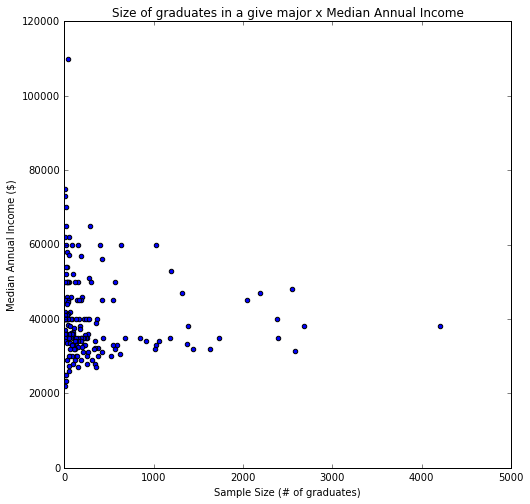

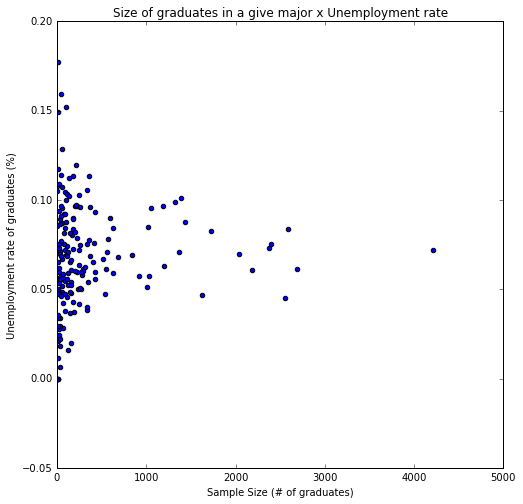

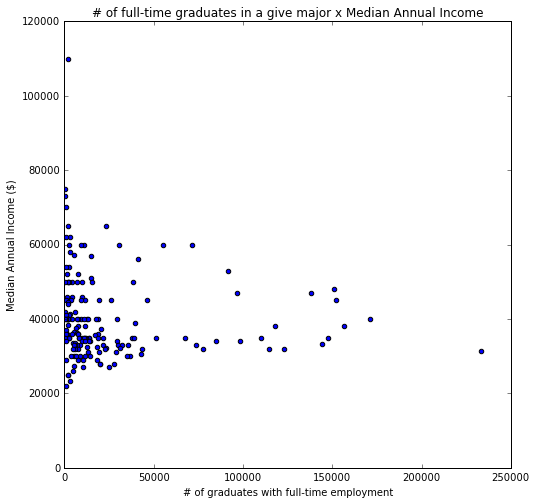

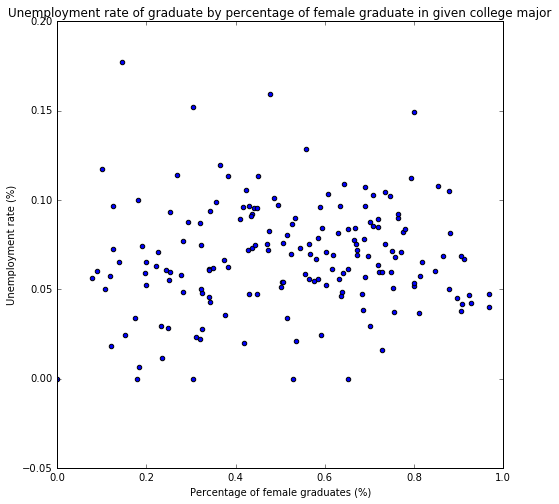

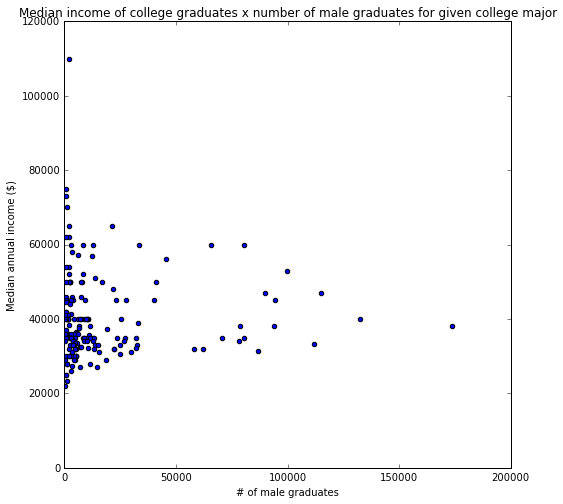

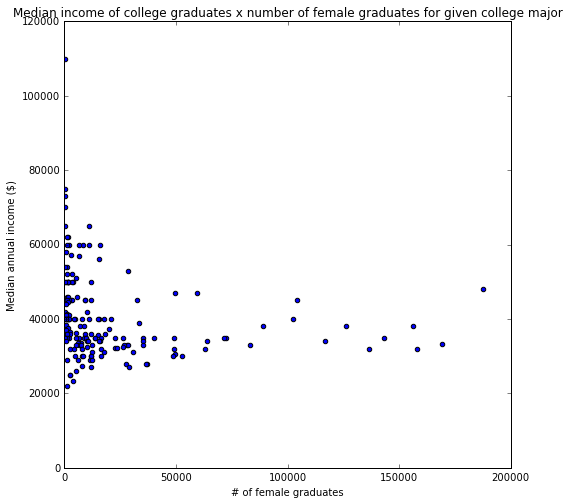

In [3]:

ax1 = recent_grads.plot("sample_size","median", kind = 'scatter', figsize = (8,8))
ax1.set_xlim(0, 5000)
ax1.set_xlabel("Sample Size (# of graduates)")
ax1.set_ylabel("Median Annual Income ($)")
ax1.set_title("Size of graduates in a give major x Median Annual Income")

ax2 = recent_grads.plot("sample_size","unemployment_rate", kind = 'scatter', figsize = (8,8))
ax2.set_xlim(0, 5000)
ax2.set_xlabel("Sample Size (# of graduates)")
ax2.set_ylabel("Unemployment rate of graduates (%)")
ax2.set_title("Size of graduates in a give major x Unemployment rate")

ax3 = recent_grads.plot("full_time","median", kind = 'scatter', figsize = (8,8))
ax3.set_xlim(0,250000)
ax3.set_xlabel("# of graduates with full-time employment")
ax3.set_ylabel("Median Annual Income ($)")
ax3.set_title("# of full-time graduates in a give major x Median Annual Income")

ax4 = recent_grads.plot("share_women", "unemployment_rate", kind = 'scatter', figsize = (8,8))
ax4.set_xlim(0, 1)
ax4.set_xlabel("Percentage of female graduates (%)")
ax4.set_ylabel("Unemployment rate (%)")
ax4.set_title("Unemployment rate of graduate by percentage of female graduate in given college major")


ax5 = recent_grads.plot("men", "median", kind = 'scatter', figsize = (8,8))
ax5.set_xlim(0, 200000)
ax5.set_xlabel("# of male graduates")
ax5.set_ylabel("Median annual income ($)")
ax5.set_title("Median income of college graduates x number of male graduates for given college major")

ax6 = recent_grads.plot("women", "median", kind = 'scatter', figsize = (8,8))
ax6.set_xlim(0, 200000)
ax6.set_xlabel("# of female graduates")
ax6.set_ylabel("Median annual income ($)")
ax6.set_title("Median income of college graduates x number of female graduates for given college major")

1) **Do students in more popular majors make more money?**
- There isn't any data to support this relationship

2) **Do students that majored in subjects that were majority female make more money?**
- There is no evidence to support this relationship

3) **Is there any link between the number of full-time employees and median salary?**
- There is no evidence to support this relationship

## Pandas Histogram + Scatter plots

In [4]:
recent_grads.describe(include = 'all')

,rank,major_code,major,total,men,women,major_category,share_women,sample_size,employed,...,part_time,full_time_year_round,unemployed,unemployment_rate,median,p25th,p75th,college_jobs,non_college_jobs,low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,FAMILY AND CONSUMER SCIENCES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


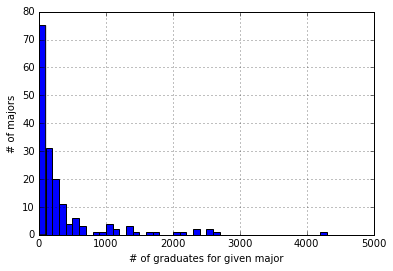

In [5]:
ax7 = recent_grads["sample_size"].hist(bins = 50, range = (0, 5000))
ax7.set_xlabel("# of graduates for given major")
ax7.set_ylabel("# of majors")

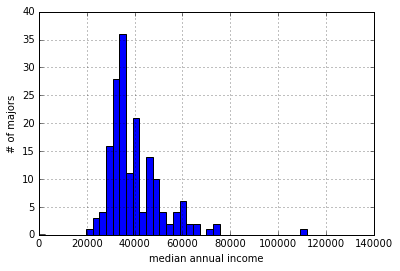

In [6]:
ax8 = recent_grads["median"].hist(bins = 50, range = (0, 140000))
ax8.set_xlabel("median annual income")
ax8.set_ylabel("# of majors")

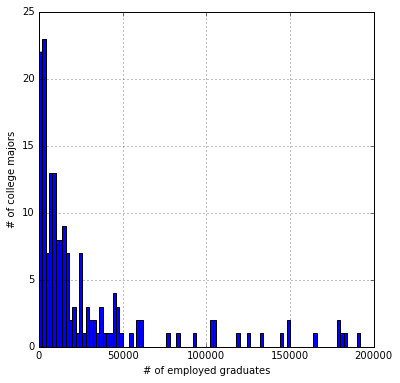

In [7]:
ax9 = recent_grads["employed"].hist(bins = 100, range = (0, 200000), figsize = (6,6))
ax9.set_xlabel("# of employed graduates")
ax9.set_ylabel("# of college majors")

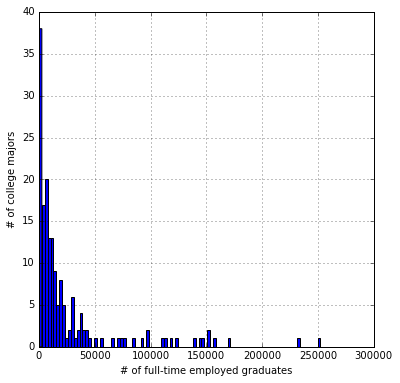

In [8]:
ax10 = recent_grads["full_time"].hist(bins = 100, range = (0, 260000), figsize = (6,6))
ax10.set_xlabel("# of full-time employed graduates")
ax10.set_ylabel("# of college majors")

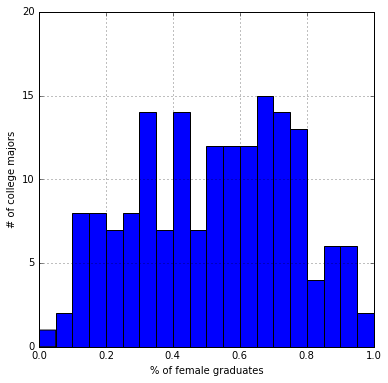

In [9]:
ax11 = recent_grads["share_women"].hist(bins = 20, range = (0, 1), figsize = (6,6))
ax11.set_xlabel("% of female graduates")
ax11.set_ylim(0, 20)
ax11.set_ylabel("# of college majors")

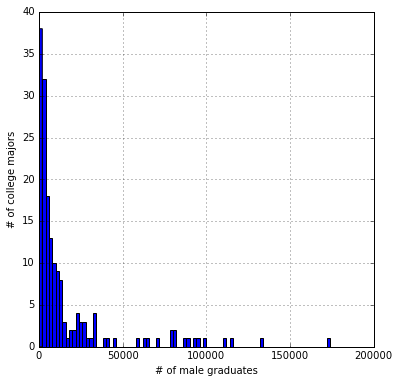

In [10]:
ax12 = recent_grads["men"].hist(bins = 100, range = (0, 200000), figsize = (6,6))
ax12.set_xlabel("# of male graduates")
ax12.set_ylabel("# of college majors")


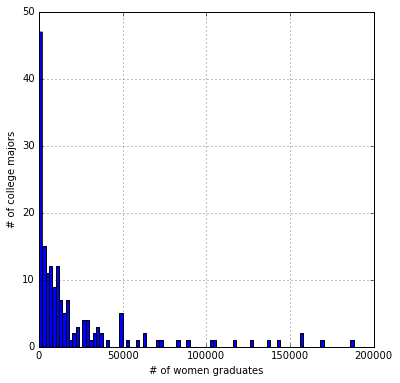

In [11]:

ax13 = recent_grads["women"].hist(bins = 100, range = (0, 200000), figsize = (6,6))
ax13.set_xlabel("# of women graduates")
ax13.set_ylabel("# of college majors")

1) **What percent of majors are predominantly male? Predominantly female?**

- It appeared that approximately 40% of majors were predominantly male whilst approx. 60% of majors were predominantly female. 

2) **What's the most common median salary range?**

- It appears that b/t 35K - 40K was the most common salary range. 

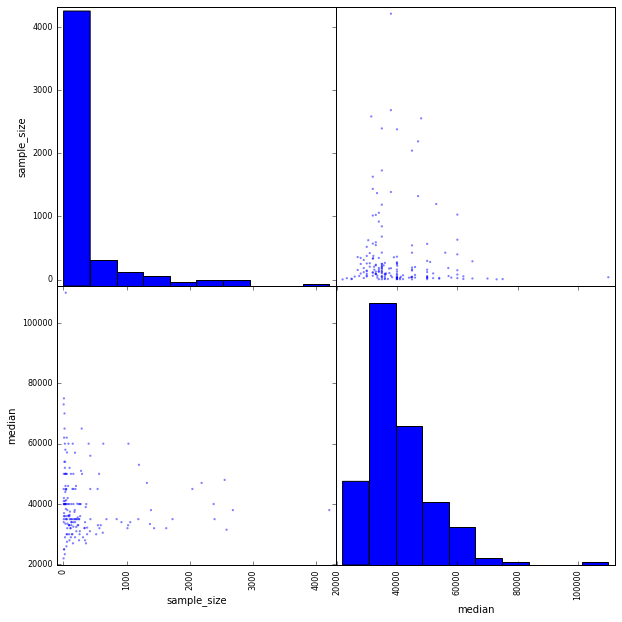

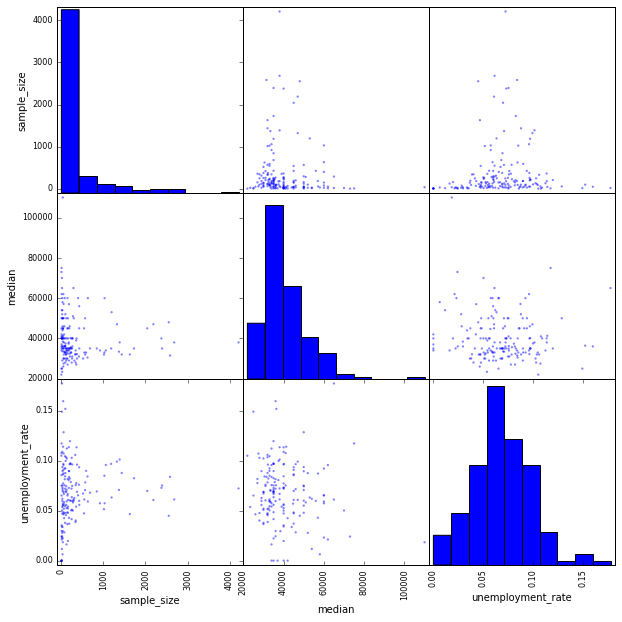

In [12]:
from pandas.plotting import scatter_matrix

ax14 = scatter_matrix(recent_grads[['sample_size','median']], figsize = (10,10))
ax15 = scatter_matrix(recent_grads[['sample_size','median', 'unemployment_rate']] , figsize = (10,10))

1) **Do students in more popular majors make more money?**
- There is no evidence to indicate that the more popular majors is correlated to a greater median annual income. 

2) **Is there any link between the number of full-time employees and median salary?**
- There is no link between the number of full-time employees and median annual income 

3) **What's the most common median salary range?**
- It appears to be b/t 35K to 40K

## Pandas, Bar Plot

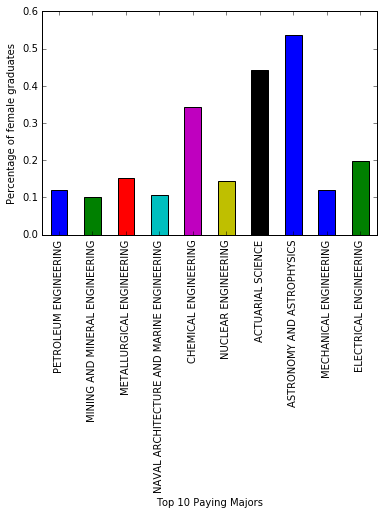

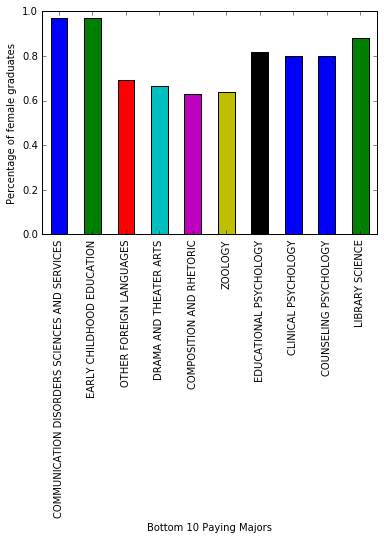

In [13]:
ax16 = recent_grads[:10].plot.bar(x = "major", y = "share_women", legend = False)
ax16.set_xlabel("Top 10 Paying Majors")
ax16.set_ylabel("Percentage of female graduates")

ax17 = recent_grads[-10:].plot.bar(x = "major", y = "share_women", legend = False)
ax17.set_xlabel("Bottom 10 Paying Majors")
ax17.set_ylabel("Percentage of female graduates")

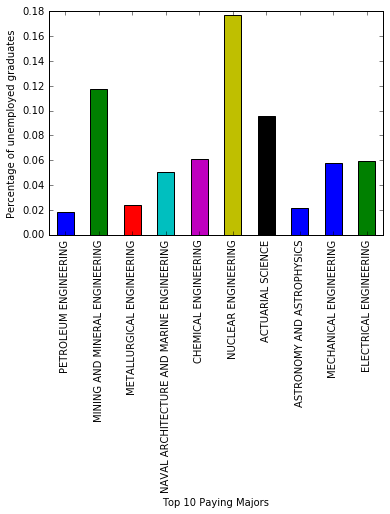

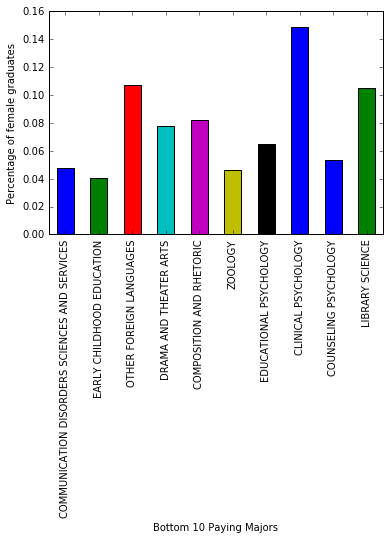

In [14]:
ax18 = recent_grads[:10].plot.bar(x = "major", y = "unemployment_rate", legend = False)
ax18.set_xlabel("Top 10 Paying Majors")
ax18.set_ylabel("Percentage of unemployed graduates")

ax19 = recent_grads[-10:].plot.bar(x = "major", y = "unemployment_rate", legend = False)
ax19.set_xlabel("Bottom 10 Paying Majors")
ax19.set_ylabel("Percentage of female graduates")

As it pertains to the relationship between the percentage of women graduates and median income, it appears that majors with a lower percentage were related with a greater annual income while the reverse is true with college majors with a greater percentage of female graduate.

There doesn't seem to be a relationship in terms of unemployment rate between the highest and lowest paying college majors. 

## Extra: Men + Women by category of Majors

In [15]:
recent_grads['major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Social Science                          9
Psychology & Social Work                9
Agriculture & Natural Resources         9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: major_category, dtype: int64

In [16]:
recent_grads.columns

recent_grads['major_category'].unique()

number_males = {}
number_females = {}

unique_category = recent_grads['major_category'].unique()

for c in unique_category: 
    rows = recent_grads[recent_grads['major_category'] == c]
    men = rows['men'].sum()
    women = rows['women'].sum()
    number_males[c] = men
    number_females[c] = women

men_majors = pd.Series(number_males)
women_majors = pd.Series(number_females)
sex_majors = pd.DataFrame(men_majors, columns = ["male_grads"])
sex_majors["female_grads"] = women_majors

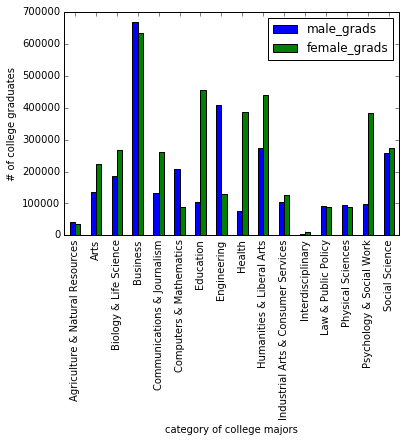

In [17]:
ax20 = sex_majors.plot.bar()
ax20.set_xlabel('category of college majors')
ax20.set_ylabel("# of college graduates")

Looking at the data, it appears that education, health, psychology + scoial work and humanities & liberal arts have a disproportionally greater makeup of female graduates when compared to their male counterparts. Conversely, the opposite is true in the case of engineering. 